### Full Name :  Parsa Hatami
### Student Number : 400100962


# Support Vector Machines (SVM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [6]:
df = pd.read_csv("Liver_Disease.csv") 

### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

Shape of the dataset: (583, 11)
Missing entries in the dataset:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64
Class counts:
1    416
2    167
Name: label, dtype: int64


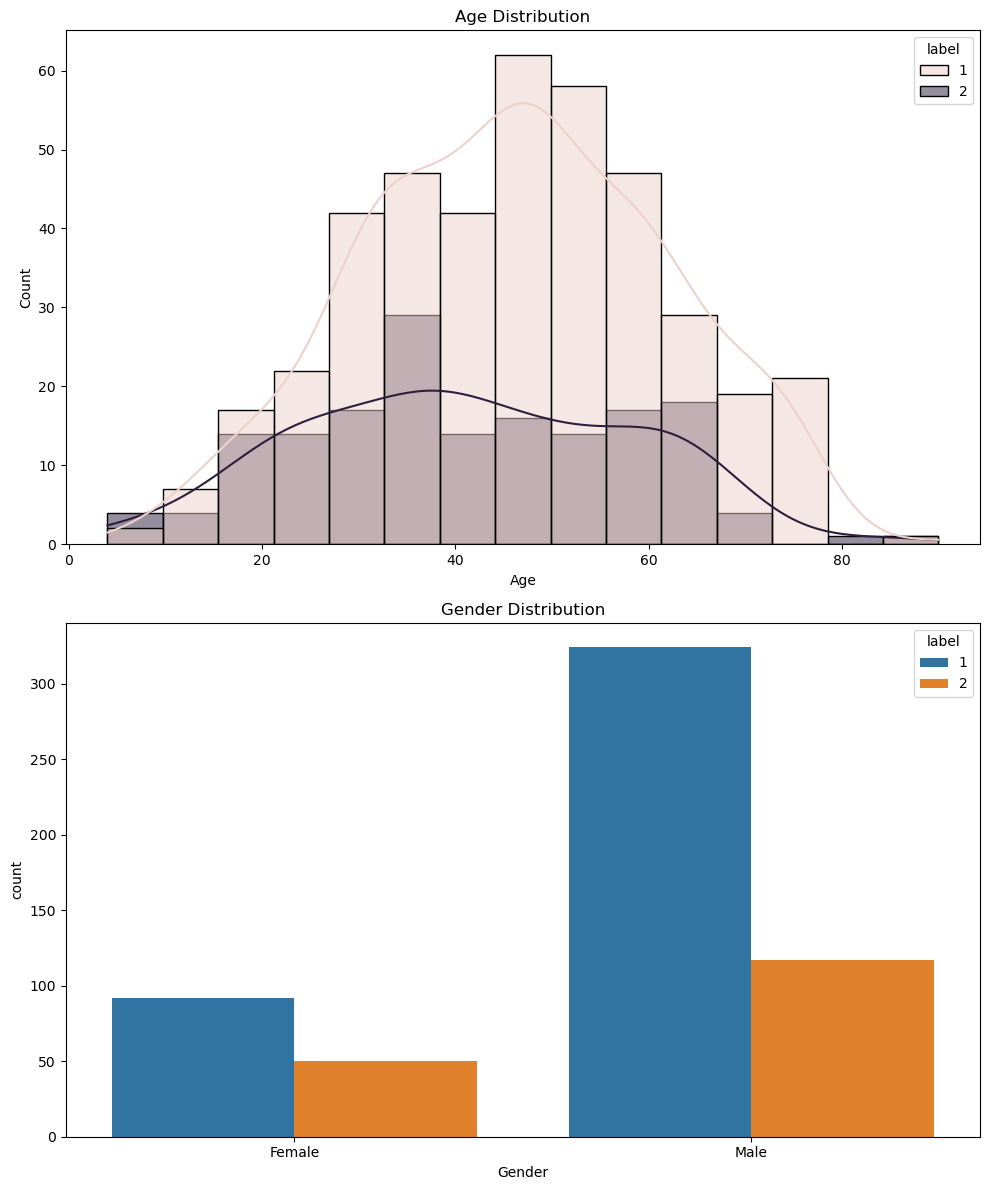

In [7]:
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
print("Shape of the dataset:", df.shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
missing_entries = df.isnull().sum()
print("Missing entries in the dataset:")
print(missing_entries)

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
###############################################################################
class_counts = df['label'].value_counts()
print("Class counts:")
print(class_counts)

###############################################################################
## TODO: plot the age distribution and gender distribution for both groups   ##
## of patients.(4 plots)                                                    ##
###############################################################################
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.histplot(data=df, x='Age', hue='label', kde=True)
plt.title('Age Distribution')

plt.subplot(2, 1, 2)
sns.countplot(data=df, x='Gender', hue='label')
plt.title('Gender Distribution')


plt.tight_layout()
plt.show()

##### Question: What do you conclude from the plots?

#### Age Distribution:
- The age distribution for both groups (label 1 and label 2) shows a relatively broad range of ages, but it appears that the "in danger" group (label 1) has more patients in the middle age range (around 30-50 years old).
- There is a notable overlap between the two groups in terms of age distribution, but the "in danger" group has a slightly higher density in the mid-age range compared to the other group.
- This suggests that patients in the "in danger" group are more concentrated around a certain age range, whereas the other group is more evenly distributed across different ages.

#### Gender Distribution:
- The "in danger" group has a larger count of male patients compared to female patients.
- The other group (label 2) also has a significant number of male patients, though the distribution between genders is more balanced compared to the "in danger" group.
- This indicates a potential correlation between gender and the "in danger" classification, with males being more represented in the "in danger" group.


From these plots, we can hypothesize that:
- Middle-aged individuals and males may be more likely to be classified as "in danger" based on this dataset.
- However, these visual observations should be statistically verified to confirm any correlations. Additional analysis, such as statistical tests or model-based evaluations, would be needed to validate these initial insights.


#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [8]:
continuous_features = [
    'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',
    'Albumin', 'Albumin_and_Globulin_Ratio', 'label'
]

print(f"Dataset shape before outlier removal: {df.shape}\n")

all_outliers = set()

for feature in continuous_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    feature_outliers = df.index[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{len(feature_outliers)} outliers detected in '{feature}' outside [{lower_bound:.2f}, {upper_bound:.2f}]")

    all_outliers.update(feature_outliers)

print(f"\nTotal rows removed due to outliers: {len(all_outliers)}")
df_cleaned = df.drop(index=all_outliers).reset_index(drop=True)
print(f"Shape of cleaned dataset: {df_cleaned.shape}\n")

print("Summary statistics of the cleaned dataset:")
print(df_cleaned.describe())


Dataset shape before outlier removal: (583, 11)

0 outliers detected in 'Age' outside [-4.50, 95.50]
84 outliers detected in 'Total_Bilirubin' outside [-1.90, 5.30]
81 outliers detected in 'Direct_Bilirubin' outside [-1.45, 2.95]
69 outliers detected in 'Alkaline_Phosphotase' outside [-8.25, 481.75]
73 outliers detected in 'Alamine_Aminotransferase' outside [-33.25, 116.75]
66 outliers detected in 'Aspartate_Aminotransferase' outside [-68.00, 180.00]
8 outliers detected in 'Total_Protiens' outside [3.70, 9.30]
0 outliers detected in 'Albumin' outside [0.80, 5.60]
10 outliers detected in 'Albumin_and_Globulin_Ratio' outside [0.10, 1.70]
0 outliers detected in 'label' outside [-0.50, 3.50]

Total rows removed due to outliers: 185
Shape of cleaned dataset: (398, 11)

Summary statistics of the cleaned dataset:
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  398.000000       398.000000        398.000000            398.000000   
mean    44.771357         

#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [9]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def preprocess_features(dataframe):
    df_processed = dataframe.copy()
    

    num_features = df_processed.select_dtypes(include=['float64', 'int64']).columns
    
    min_max_scaler = MinMaxScaler()
    df_processed[num_features] = min_max_scaler.fit_transform(df_processed[num_features])
    print("\nNormalization Step:")
    for feature in num_features:
        min_val, max_val = df_processed[feature].min(), df_processed[feature].max()
        print(f" - '{feature}' normalized to range [{min_val:.2f}, {max_val:.2f}]")
    

    if 'Gender' in df_processed.columns:
        encoder = LabelEncoder()
        df_processed['Gender'] = encoder.fit_transform(df_processed['Gender'])
        print("\nCategorical Encoding Step:")
        print(f" - 'Gender' encoded with unique classes: {list(encoder.classes_)}")
    
    return df_processed

df_transformed = preprocess_features(cleaned_df)

print("\nPreview of the feature-engineered DataFrame (first 5 rows):")
print(df_transformed.head())


df_transformed


Normalization Step:
 - 'Age' normalized to range [0.00, 1.00]
 - 'Total_Bilirubin' normalized to range [0.00, 1.00]
 - 'Direct_Bilirubin' normalized to range [0.00, 1.00]
 - 'Alkaline_Phosphotase' normalized to range [0.00, 1.00]
 - 'Alamine_Aminotransferase' normalized to range [0.00, 1.00]
 - 'Aspartate_Aminotransferase' normalized to range [0.00, 1.00]
 - 'Total_Protiens' normalized to range [0.00, 1.00]
 - 'Albumin' normalized to range [0.00, 1.00]
 - 'Albumin_and_Globulin_Ratio' normalized to range [0.00, 1.00]
 - 'label' normalized to range [0.00, 1.00]

Categorical Encoding Step:
 - 'Gender' encoded with unique classes: ['Female', 'Male']

Preview of the feature-engineered DataFrame (first 5 rows):
        Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  0.709302       0         0.061224          0.000000              0.225045   
3  0.627907       1         0.122449          0.136364              0.215971   
4  0.790698       1         0.714286        

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,0.709302,0,0.061224,0.000000,0.225045,0.049587,0.057971,0.594203,0.521739,0.346405,0.0
3,0.627907,1,0.122449,0.136364,0.215971,0.033058,0.072464,0.594203,0.543478,0.411765,0.0
4,0.790698,1,0.714286,0.863636,0.239564,0.140496,0.355072,0.666667,0.326087,0.019608,0.0
5,0.488372,1,0.285714,0.272727,0.263158,0.074380,0.028986,0.710145,0.760870,0.607843,0.0
6,0.255814,0,0.102041,0.045455,0.165154,0.049587,0.014493,0.623188,0.565217,0.411765,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1,0.020408,0.000000,0.793103,0.082645,0.173913,0.463768,0.152174,0.000000,1.0
579,0.418605,1,0.040816,0.000000,0.063521,0.206612,0.152174,0.478261,0.500000,0.477124,0.0
580,0.558140,1,0.081633,0.045455,0.330309,0.314050,0.282609,0.536232,0.500000,0.411765,0.0
581,0.313953,1,0.183673,0.181818,0.219601,0.157025,0.159420,0.594203,0.543478,0.411765,0.0


### SVM

#### spliting data

In [10]:
from sklearn.model_selection import train_test_split

X = df_transformed.drop(columns=['label'])
y = df_transformed['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (313, 10) (313,)
Testing data shape: (105, 10) (105,)


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['label'])
y = df['label']

numeric_features = [
    'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',
    'Albumin', 'Albumin_and_Globulin_Ratio'
]
categorical_features = ['Gender']

numeric_transform = Pipeline([
    ('impute_mean', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

categorical_transform = Pipeline([
    ('impute_mode', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transform, numeric_features),
    ('cat', categorical_transform, categorical_features)
])

svm_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('svm', SVC(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
print("\nEvaluation Summary")
print("-" * 30)
print(f"Test Accuracy: {test_acc:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted Neg', 'Predicted Pos'], index=['Actual Neg', 'Actual Pos']))

cv_scores = cross_val_score(svm_pipeline, X, y, cv=5)
print("\nCross-Validation Summary")
print("-" * 30)
print(f"Cross-Validation Scores per Fold: {cv_scores.round(2)}")
print(f"Average CV Accuracy: {cv_scores.mean():.2f}")



Evaluation Summary
------------------------------
Test Accuracy: 0.69

Detailed Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.97      0.82       104
           2       0.00      0.00      0.00        42

    accuracy                           0.69       146
   macro avg       0.35      0.49      0.41       146
weighted avg       0.50      0.69      0.58       146


Confusion Matrix:
            Predicted Neg  Predicted Pos
Actual Neg            101              3
Actual Pos             42              0

Cross-Validation Summary
------------------------------
Cross-Validation Scores per Fold: [0.7  0.71 0.71 0.72 0.72]
Average CV Accuracy: 0.71


#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(estimator=svm_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nGrid Search Summary")
print("-" * 30)
print(f"Best Parameters Found: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

print("\nDetailed Parameter Search Results:")
print("-" * 30)
results = pd.DataFrame(grid_search.cv_results_)
for i, row in results.iterrows():
    print(f"Combination {i + 1}: {row['params']}")
    print(f"Mean Accuracy: {row['mean_test_score']:.4f} (±{row['std_test_score']:.4f})")
    print("-" * 30)
    
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"\nTest Accuracy with Best Parameters: {test_accuracy:.2f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits

Grid Search Summary
------------------------------
Best Parameters Found: {'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.71

Detailed Parameter Search Results:
------------------------------
Combination 1: {'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Mean Accuracy: 0.7139 (±0.0016)
------------------------------
Combination 2: {'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel': 'linear'}
Mean Accuracy: 0.7139 (±0.0016)
------------------------------
Combination 3: {'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Mean Accuracy: 0.7139 (±0.0016)
------------------------------
Combination 4: {'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}
Mean Accuracy: 0.7139 (±0.0016)
------------------------------
Combination 5: {'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Mean Accuracy: 0.7139 (±0.0016)
------------------------------
Combination 6: {'svm__C': 

Train an svm model on the entire training data using the parameters you found in the previous step.

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score

best_params = grid_search.best_params_

final_svm_model = SVC(
    C=best_params['svm__C'],
    kernel=best_params['svm__kernel'],
    gamma=best_params['svm__gamma'],
    random_state=42
)

preprocessor.fit(X)
X_transformed = preprocessor.transform(X)

final_svm_model.fit(X_transformed, y)

cv_scores = cross_val_score(final_svm_model, X_transformed, y, cv=5, scoring='accuracy')
print("\nFinal Model Cross-Validation Accuracy (5-Fold):")
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

y_pred = final_svm_model.predict(X_transformed)

accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
precision = precision_score(y, y_pred, average='weighted')

print("\nFinal Model Performance on Entire Dataset")
print("-" * 30)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

print("\nClassification Report:")
print(classification_report(y, y_pred))



Final Model Cross-Validation Accuracy (5-Fold):
Cross-Validation Scores: [0.71794872 0.70940171 0.70940171 0.71551724 0.71551724]
Mean Cross-Validation Accuracy: 0.71

Final Model Performance on Entire Dataset
------------------------------
Accuracy: 0.71
F1 Score: 0.59
Recall: 0.71
Precision: 0.51

Classification Report:
              precision    recall  f1-score   support

           1       0.71      1.00      0.83       416
           2       0.00      0.00      0.00       167

    accuracy                           0.71       583
   macro avg       0.36      0.50      0.42       583
weighted avg       0.51      0.71      0.59       583



c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classificati

### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

A confusion matrix is a table used to evaluate the performance of a classification model by comparing the predicted values with the actual values. It helps to understand how well the model performs in terms of correctly and incorrectly classified instances. In a binary classification problem, a confusion matrix typically has four entries:

| Actual / Predicted | Predicted Positive | Predicted Negative |
|--------------------|--------------------|--------------------|
| **Actual Positive**  | True Positive (TP)  | False Negative (FN) |
| **Actual Negative**  | False Positive (FP) | True Negative (TN)  |

Each entry in the confusion matrix has a specific meaning:

1. **True Positive (TP)**:
   - This is the count of instances where the model correctly predicted the positive class.
   - Example: In a medical diagnosis model for detecting a disease, a true positive would be a patient who actually has the disease and was correctly identified by the model as positive.

2. **True Negative (TN)**:
   - This is the count of instances where the model correctly predicted the negative class.
   - Example: In the same medical diagnosis model, a true negative would be a patient who does not have the disease and was correctly identified by the model as negative.

3. **False Positive (FP)** (Type I Error):
   - This is the count of instances where the model incorrectly predicted the positive class when the actual class was negative.
   - Example: In the medical diagnosis scenario, a false positive would be a patient who does not have the disease but was incorrectly classified by the model as positive. This type of error is also known as a **Type I error**.

4. **False Negative (FN)** (Type II Error):
   - This is the count of instances where the model incorrectly predicted the negative class when the actual class was positive.
   - Example: In the medical diagnosis scenario, a false negative would be a patient who actually has the disease but was incorrectly classified by the model as negative. This type of error is also known as a **Type II error**.

### Entries:

- **True Positives (TP)** and **True Negatives (TN)** represent the model’s correct predictions.
- **False Positives (FP)** and **False Negatives (FN)** represent the model’s incorrect predictions.

These entries in the confusion matrix allow us to calculate various performance metrics for a model, such as **accuracy, precision, recall,** and **F1 score**. Each of these metrics provides insight into the model's reliability and error rates, helping to understand the types of mistakes the model is likely to make.


Model Accuracy on Test Set: 0.71


<Figure size 800x600 with 0 Axes>

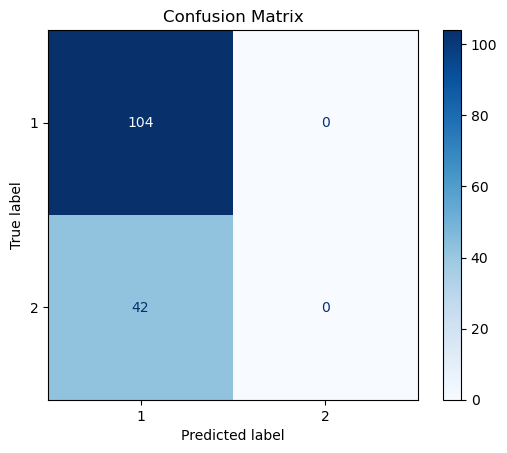

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

X_test_transformed = preprocessor.transform(X_test)

y_test_pred = final_svm_model.predict(X_test_transformed)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Model Accuracy on Test Set: {test_accuracy:.2f}")

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_svm_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.


--- SVM Model Results with Outliers ---
Test Set Accuracy: 69.2%

Detailed Classification Report (SVM):
               precision    recall  f1-score   support

Not in Danger       0.71      0.97      0.82       104
    In Danger       0.00      0.00      0.00        42

     accuracy                           0.69       146
    macro avg       0.35      0.49      0.41       146
 weighted avg       0.50      0.69      0.58       146


--- Logistic Regression Model Results with Outliers ---
Test Set Accuracy: 69.9%

Detailed Classification Report (Logistic Regression):
               precision    recall  f1-score   support

Not in Danger       0.74      0.88      0.81       104
    In Danger       0.45      0.24      0.31        42

     accuracy                           0.70       146
    macro avg       0.60      0.56      0.56       146
 weighted avg       0.66      0.70      0.66       146



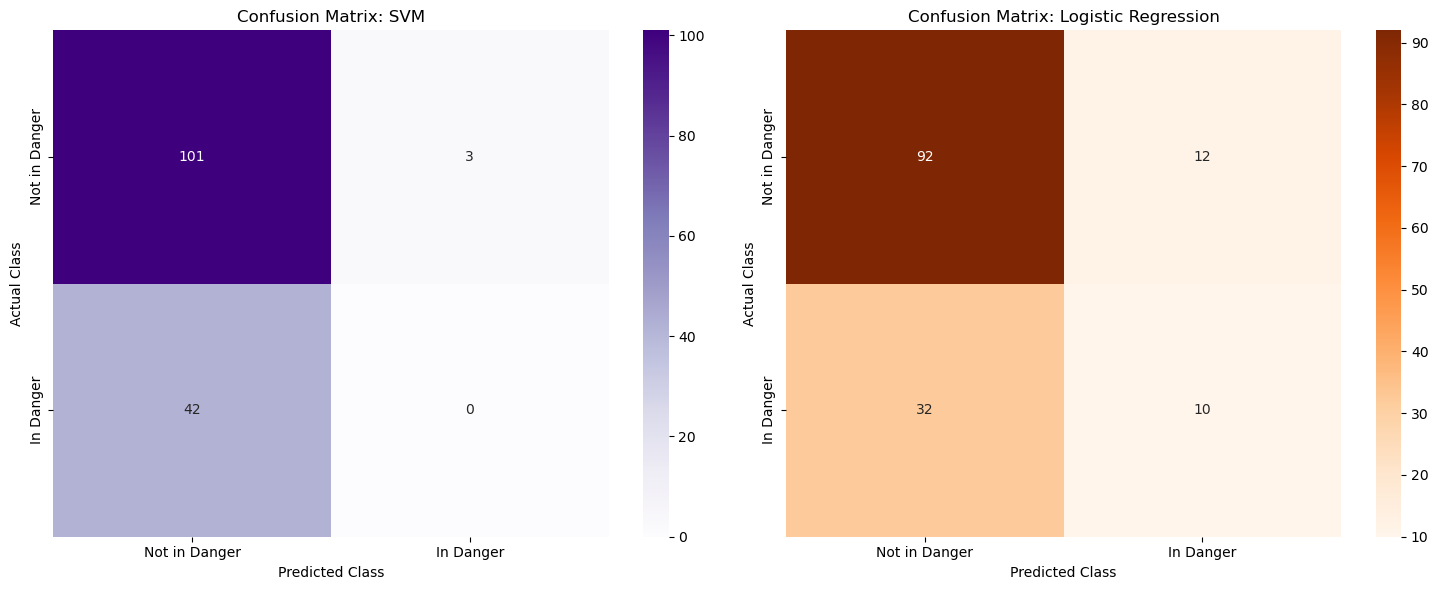

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

numerical_features = [
    'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',
    'Albumin', 'Albumin_and_Globulin_Ratio'
]
categorical_features = ['Gender']  

numeric_processing = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

categorical_processing = Pipeline(steps=[
    ('impute_mode', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encode', OneHotEncoder(handle_unknown='ignore'))
])

preprocess_pipeline = ColumnTransformer(transformers=[
    ('num_features', numeric_processing, numerical_features),
    ('cat_features', categorical_processing, categorical_features)
])

pipeline_svm = make_pipeline(preprocess_pipeline, SVC(random_state=42))
pipeline_logreg = make_pipeline(preprocess_pipeline, LogisticRegression(max_iter=1000, random_state=24))

X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("\n--- SVM Model Results with Outliers ---")
print(f"Test Set Accuracy: {svm_acc * 100:.1f}%")
print("\nDetailed Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=['Not in Danger', 'In Danger'], zero_division=0))
cm_svm = confusion_matrix(y_test, y_pred_svm)

pipeline_logreg.fit(X_train, y_train)
y_pred_logreg = pipeline_logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred_logreg)
print("\n--- Logistic Regression Model Results with Outliers ---")
print(f"Test Set Accuracy: {logreg_acc * 100:.1f}%")
print("\nDetailed Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg, target_names=['Not in Danger', 'In Danger'], zero_division=0))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

def display_confusion_matrices(cm1, cm2, model_labels, class_labels):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Purples', xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
    axes[0].set_title(f'Confusion Matrix: {model_labels[0]}')
    axes[0].set_xlabel("Predicted Class")
    axes[0].set_ylabel("Actual Class")
    
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
    axes[1].set_title(f'Confusion Matrix: {model_labels[1]}')
    axes[1].set_xlabel("Predicted Class")
    axes[1].set_ylabel("Actual Class")
    
    plt.tight_layout()
    plt.show()

display_confusion_matrices(cm_svm, cm_logreg, model_labels=['SVM', 'Logistic Regression'], class_labels=['Not in Danger', 'In Danger'])
